In [362]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [363]:
os.chdir("C:\\Users\\sudheer\\Desktop\\git_repos\\Salary-prediction")
os.getcwd()

'C:\\Users\\sudheer\\Desktop\\git_repos\\Salary-prediction'

In [364]:

df = pd.read_csv("C:\\Users\\sudheer\\Desktop\\data sets\\tableau data\\salary prediction(data science)\\salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [365]:
df.shape

(88584, 11)

In [366]:

a = ["Data Scientist","Data Analyst","Business Analyst","Data Specialist","Analyst","Data Manager"]
b = df["company_location"].value_counts()
b

company_location
US    79762
CA     3204
GB     2584
AU      303
DE      272
      ...  
IR        1
BS        1
IQ        1
CN        1
MD        1
Name: count, Length: 90, dtype: int64

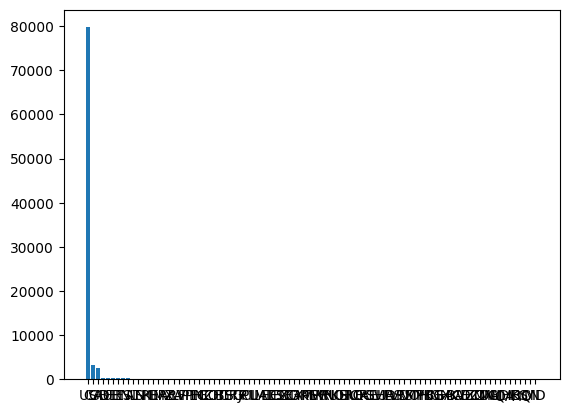

In [367]:
plt.bar(b.index,b)
plt.show()

In [368]:
b1 = b[b>200].index
print(b1)

Index(['US', 'CA', 'GB', 'AU', 'DE', 'FR', 'LT'], dtype='object', name='company_location')


In [369]:
df1 = df[(df["company_location"].isin(b1))&
         (df["job_title"].isin(a))]
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2025,EN,FT,Data Analyst,82000,USD,82000,US,0,US,M
6,2025,EN,FT,Data Analyst,44000,USD,44000,US,0,US,M
11,2025,SE,FT,Data Scientist,160000,USD,160000,US,0,US,M
12,2025,SE,FT,Data Scientist,130000,USD,130000,US,0,US,M
20,2025,MI,FT,Data Scientist,140000,USD,140000,US,100,US,M


In [370]:
df1.shape

(24627, 11)

In [371]:
df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\sudheer\AppData\Local\Temp\ipykernel_4156\3167013867.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [372]:
el_mapping = {
    "en" : 1,
    "mi" : 2,
    "se" : 3,
    "ex" : 4
}
cs_mapping = {
    "s" : 1,
    "m" : 2,
    "l" : 3
}

In [373]:
df1["currency_ratio"] = round(df["salary"]/df["salary_in_usd"],2)
#df["currecy_ratio"]  = df["curreny_ratio"].round()

In [374]:
# Creating a dictionary with unique item prices
item_price_dict = df1.groupby('salary_currency')['currency_ratio'].first().to_dict()

print(item_price_dict)


{'aud': 1.5, 'cad': 1.4, 'eur': 0.95, 'gbp': 0.79, 'inr': 78.63, 'pln': 4.0, 'sgd': 1.34, 'usd': 1.0}


In [375]:
f = df1.groupby('salary_currency')["currency_ratio"].unique()
f.head()

salary_currency
aud                [1.5, 1.44, 1.33]
cad           [1.4, 1.3, 1.35, 1.25]
eur    [0.95, 0.9, 0.93, 0.88, 0.85]
gbp    [0.79, 0.8, 0.81, 0.73, 0.78]
inr                   [78.63, 73.95]
Name: currency_ratio, dtype: object

In [376]:
df1["el"]= df1["experience_level"].map(el_mapping)
df1["cs"] = df1["company_size"].map(cs_mapping)
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,currency_ratio,el,cs
5,2025,en,ft,data analyst,82000,usd,82000,us,0,us,m,1.0,1,2
6,2025,en,ft,data analyst,44000,usd,44000,us,0,us,m,1.0,1,2
11,2025,se,ft,data scientist,160000,usd,160000,us,0,us,m,1.0,3,2
12,2025,se,ft,data scientist,130000,usd,130000,us,0,us,m,1.0,3,2
20,2025,mi,ft,data scientist,140000,usd,140000,us,100,us,m,1.0,2,2


In [377]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24627 entries, 5 to 88581
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           24627 non-null  int64  
 1   experience_level    24627 non-null  object 
 2   employment_type     24627 non-null  object 
 3   job_title           24627 non-null  object 
 4   salary              24627 non-null  int64  
 5   salary_currency     24627 non-null  object 
 6   salary_in_usd       24627 non-null  int64  
 7   employee_residence  24627 non-null  object 
 8   remote_ratio        24627 non-null  int64  
 9   company_location    24627 non-null  object 
 10  company_size        24627 non-null  object 
 11  currency_ratio      24627 non-null  float64
 12  el                  24627 non-null  int64  
 13  cs                  24627 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 2.8+ MB


In [378]:

x = df1.drop(columns=["experience_level","company_size","salary","salary_in_usd","salary_currency","employee_residence","currency_ratio"])
y = df1["salary_in_usd"]

In [379]:
x.head()

,work_year,employment_type,job_title,remote_ratio,company_location,el,cs
5,2025,ft,data analyst,0,us,1,2
6,2025,ft,data analyst,0,us,1,2
11,2025,ft,data scientist,0,us,3,2
12,2025,ft,data scientist,0,us,3,2
20,2025,ft,data scientist,100,us,2,2


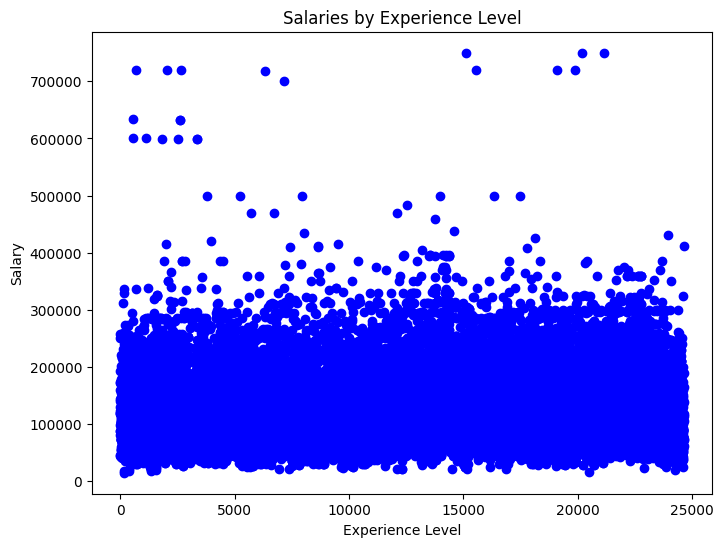

In [443]:
# Define custom colors for each experience level
colors = ['skyblue', 'lightgreen', 'orange', 'purple']
xa = list(range(len(df1["salary"])))
# Plot salaries by experience level with custom colors
plt.figure(figsize=(8, 6))
plt.scatter(xa, df1['salary_in_usd'], color="blue")

# Add labels and title
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Salaries by Experience Level')

#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


In [380]:
def one_hot(a):
    for col in a.columns:
        if a[col].dtypes == "object":
            dummies = pd.get_dummies(a[col],drop_first = False).astype(int)
            a=pd.concat([a,dummies],axis=1)
            a=a.drop(col,axis=1)
    return a    

In [381]:
x = one_hot(x)

In [382]:
x.head()

,work_year,remote_ratio,el,cs,ct,fl,ft,pt,analyst,business analyst,...,data manager,data scientist,data specialist,au,ca,de,fr,gb,lt,us
5,2025,0,1,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2025,0,1,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,2025,0,3,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
12,2025,0,3,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
20,2025,100,2,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [431]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#from skgarden import RandomForestQuantileRegressor as QR
from sklearn.metrics import mean_squared_error,mean_absolute_error

 Quantile linear regression

In [385]:
x = sm.add_constant(x)

In [386]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [423]:
quantiles=[0.1,0.5,0.98]
models = {}
predictions = {}
for q in quantiles:
    models[q] = sm.QuantReg(y_train,x_train).fit(q=q)
    print(f"Quantile {q}")
    predictions[q] = models[q].predict(x_test)

Quantile 0.1


C:\Users\sudheer\anaconda3\envs\notebook\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Quantile 0.5
Quantile 0.98


C:\Users\sudheer\anaconda3\envs\notebook\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [437]:
for q, preds in predictions.items():
    print(f"Predictions for Quantile {q}:")
    mse = mean_squared_error(y_test,preds)
    mae = mean_absolute_error(y_test,preds)
    print("mean square error:",mse)
    print("mean absolute error:",mae, "\n")

Predictions for Quantile 0.1:
mean square error: 5936969126.074908
mean absolute error: 57708.17528995254 

Predictions for Quantile 0.5:
mean square error: 2750559183.7990365
mean absolute error: 37505.49986902203 

Predictions for Quantile 0.98:
mean square error: 17657828342.93449
mean absolute error: 122870.69772053954 



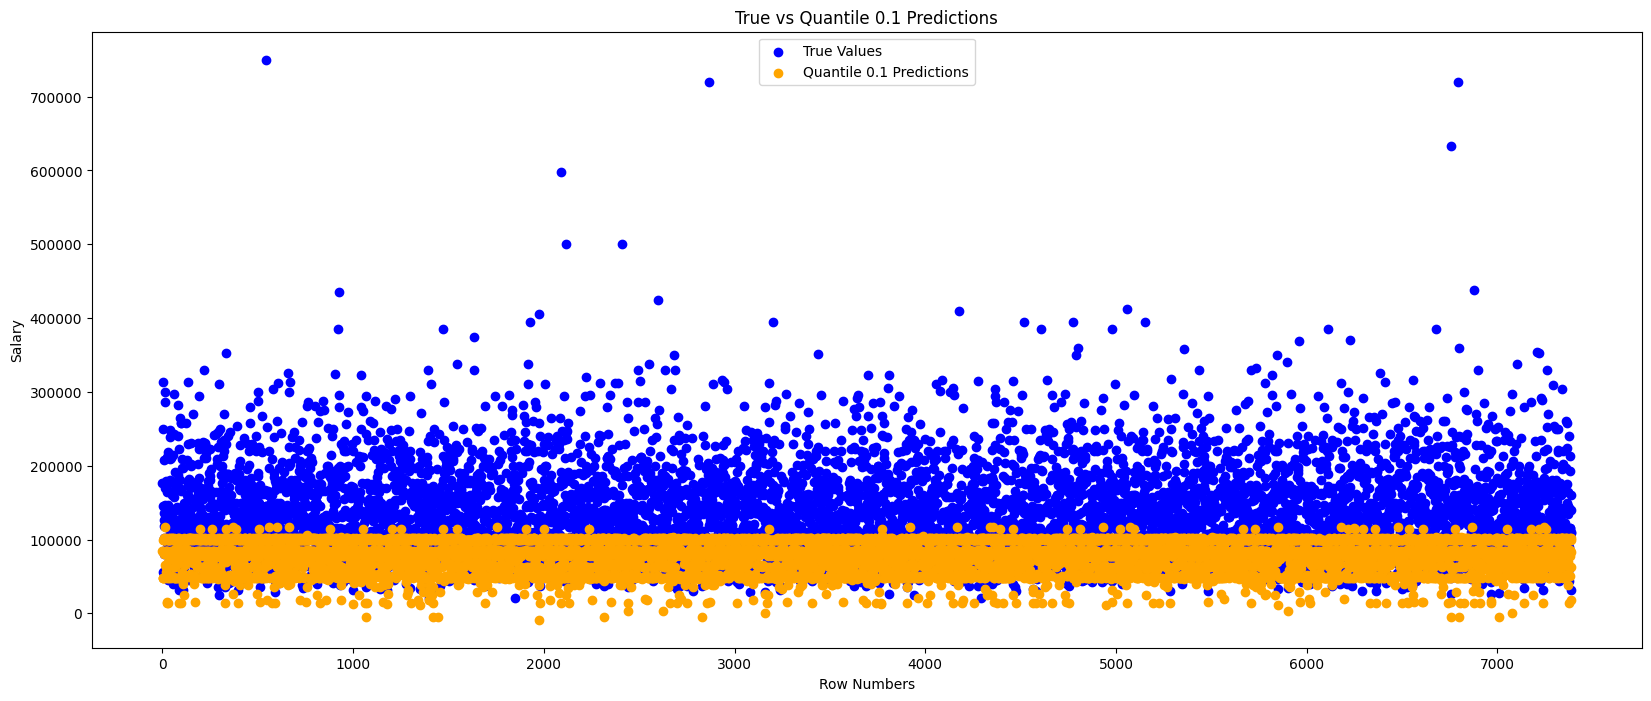

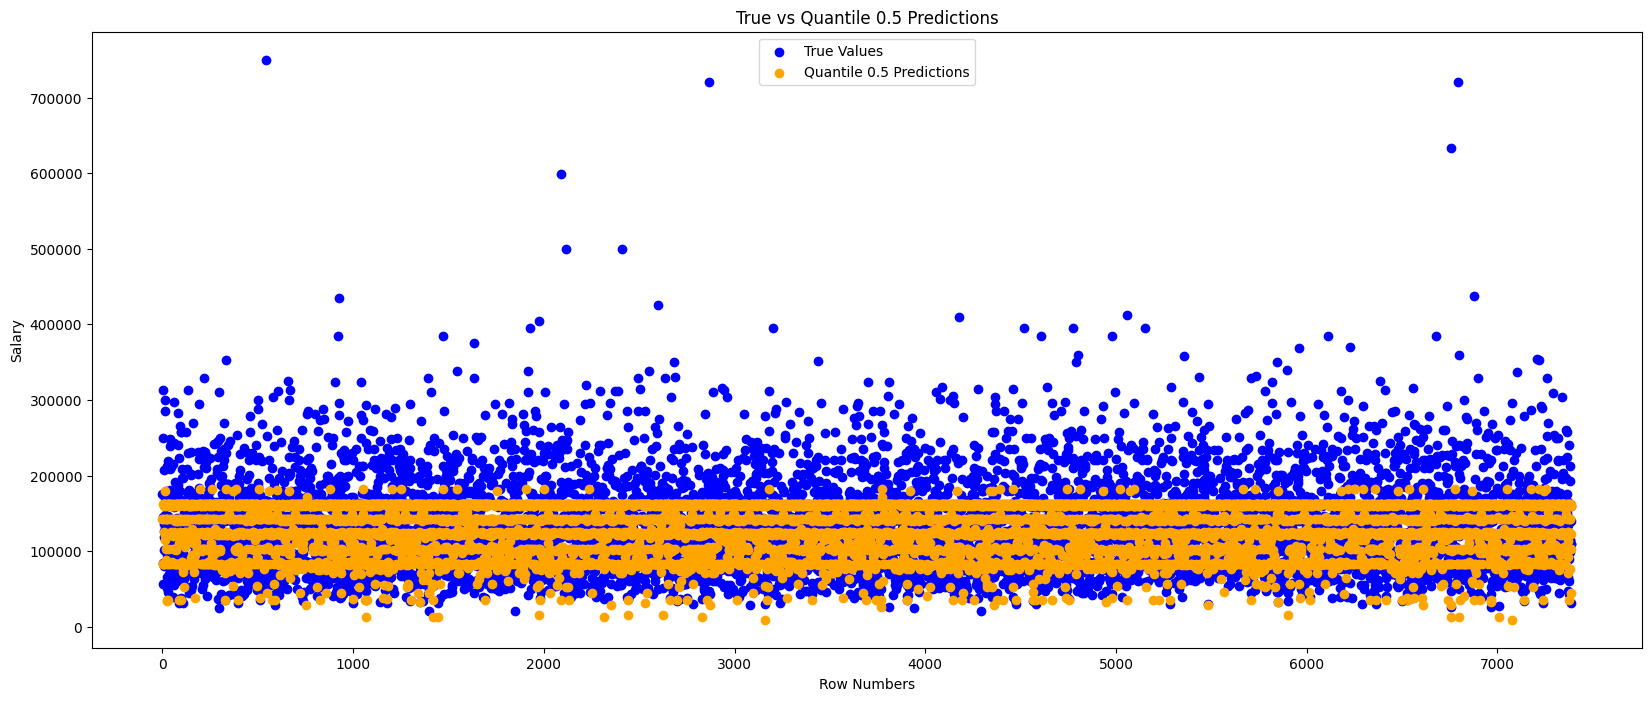

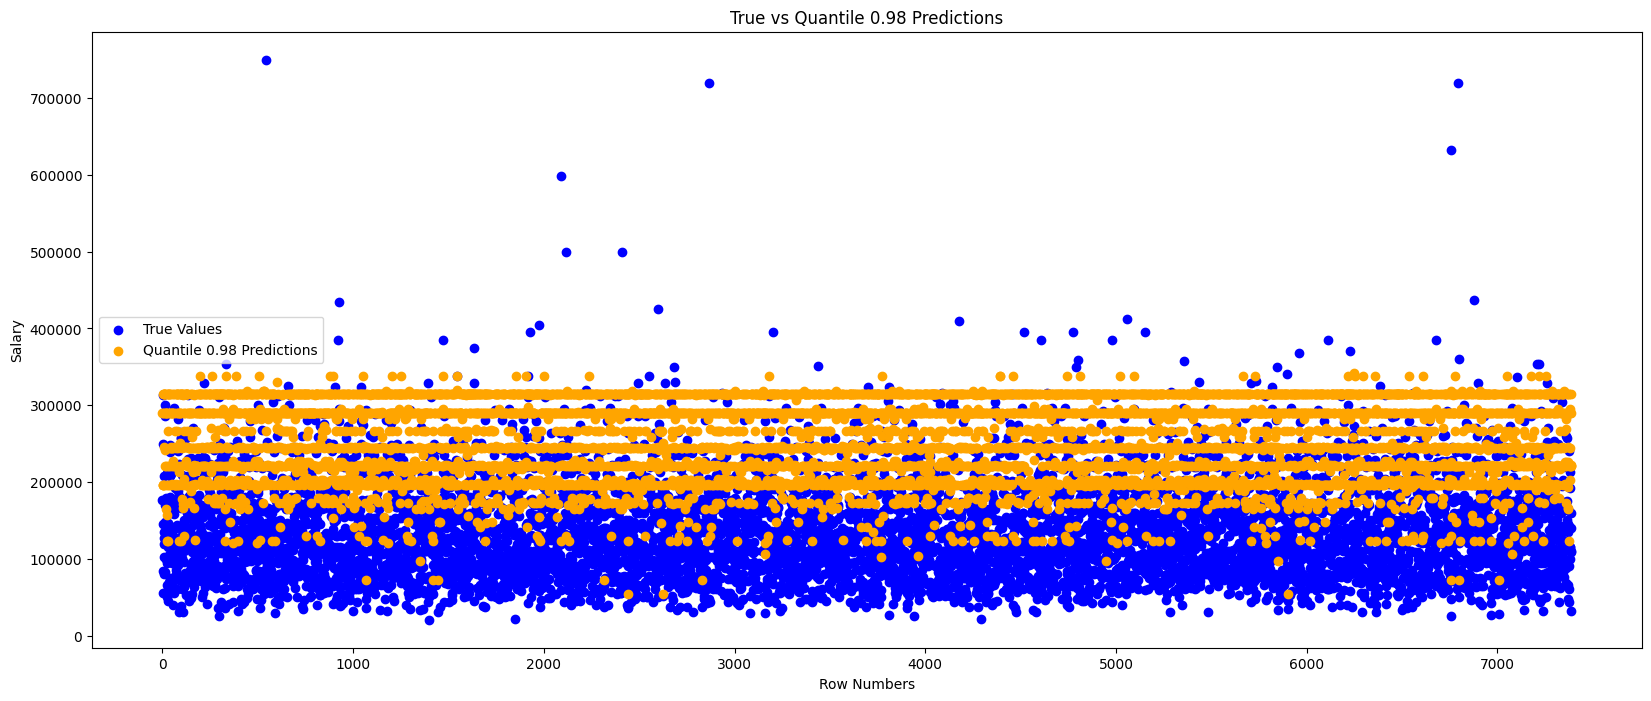

In [427]:
# Plot predictions for each quantile along with true values

row_numbers = list(range(len(y_test)))
for i, q in enumerate(quantiles):
    plt.figure(figsize=(20, 8))
    plt.scatter(row_numbers, y_test, label='True Values', color='blue')  # True values
    plt.scatter(row_numbers, predictions[q], label=f'Quantile {q} Predictions', color='orange')  # Predictions
    plt.xlabel('Row Numbers')
    plt.ylabel('Salary')
    plt.title(f'True vs Quantile {q} Predictions')
    plt.legend()
    plt.show()